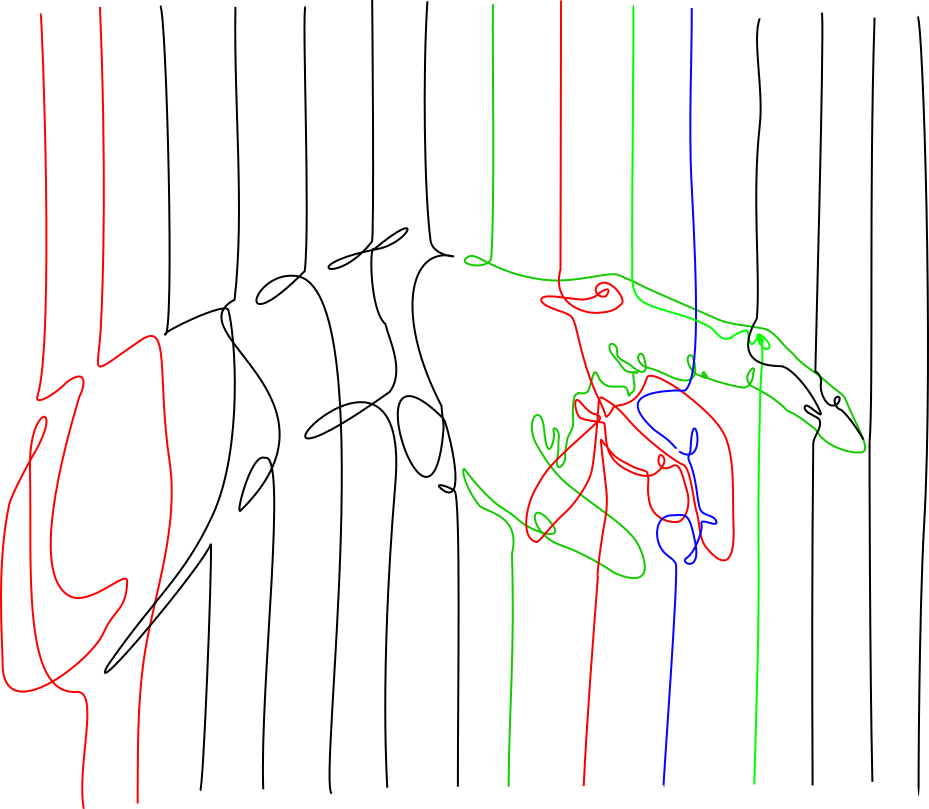

In [1]:
# Aphex like image to sound converson
from matplotlib import pyplot as plt
from scipy.io import wavfile
import numpy as np
from scipy.fft import fft, ifft, fft2, ifft2
from scipy.signal import fftconvolve
import imageio
import IPython

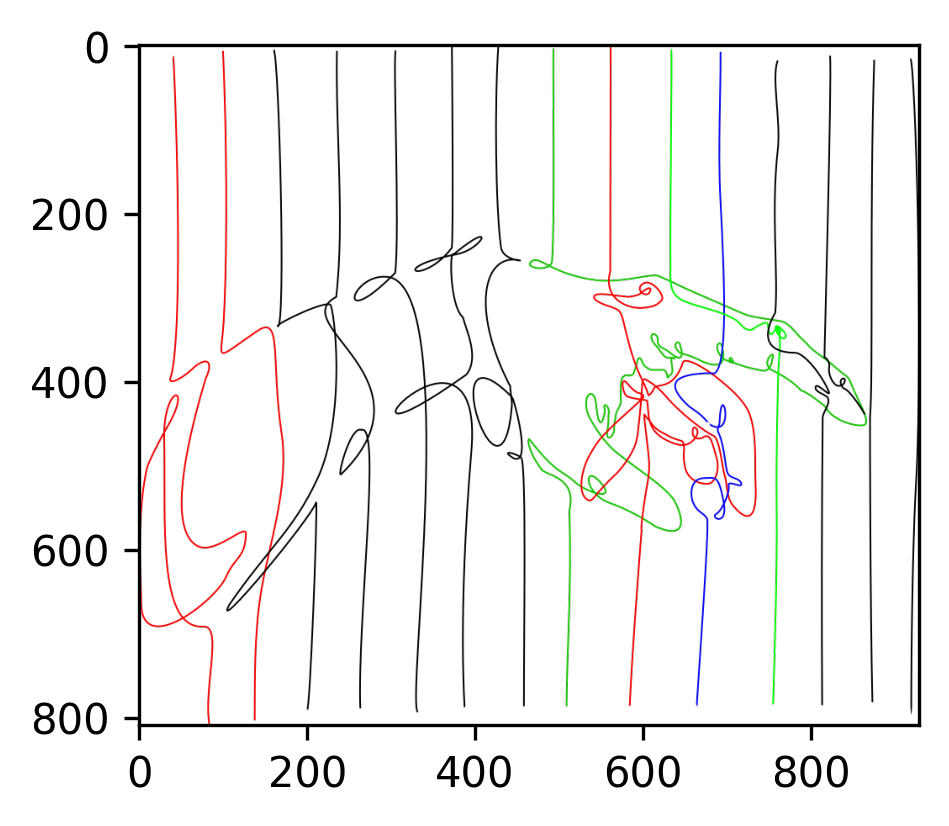

In [41]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

path = '../pics/'
files = ['my_hand_.png', 'blackHole.jpg']
image = imageio.imread(path+files[0])
plt.imshow(image, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


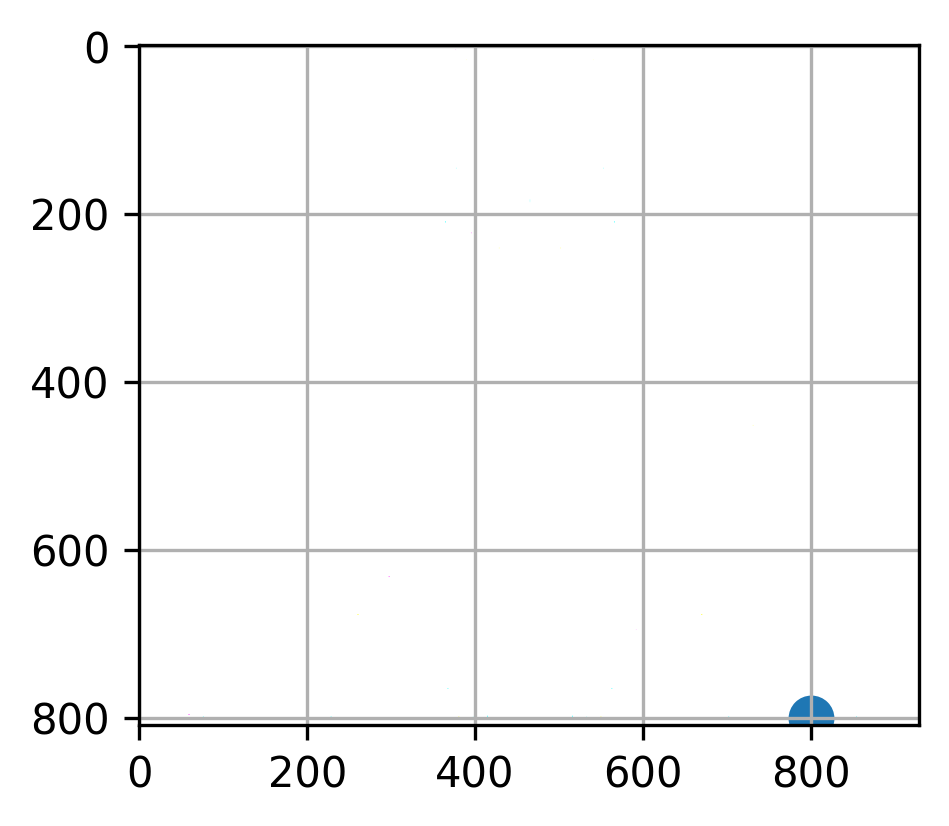

In [52]:
im_dft = fft2(image)
plt.imshow(np.log(np.abs(im_dft)), cmap='gray')
plt.grid()
plt.scatter(800,800,s=100)

In [59]:
def patch(dft, y, x, s=2): # x and y are swapped for images
    # method find average at radius=s/2, fill square x,y w/avg
    l = []
    #print(f'{x},{y}:')
    for t in np.arange(0, 2*np.pi, np.pi/s):
        xx = int((s/2) * np.sin(t))+x
        yy = int((s/2) * np.cos(t))+y
        #print(f'({xx},{yy})')
        l.append(dft[xx,yy])
    v = np.mean(l)
    #print(v)
    
    if (False):
        for r in range(0,s):
            for t in np.arange(0, 2*np.pi, np.pi/s):
                xx = int(r * np.sin(t))+x
                yy = int(r * np.cos(t))+y
                xxx = int((r+s/2) * np.sin(t))+x
                yyy = int((r+s/2)* np.cos(t))+y
                dft[xx,yy] = dft[xxx,yyy]#v

    else:
        p = int(8/2)
        for xx in range(-p,p):
            for yy in range(-p,p):
                #print(f'{xx+x},{yy+y}')
                dft[xx+x, yy+y] = v/2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


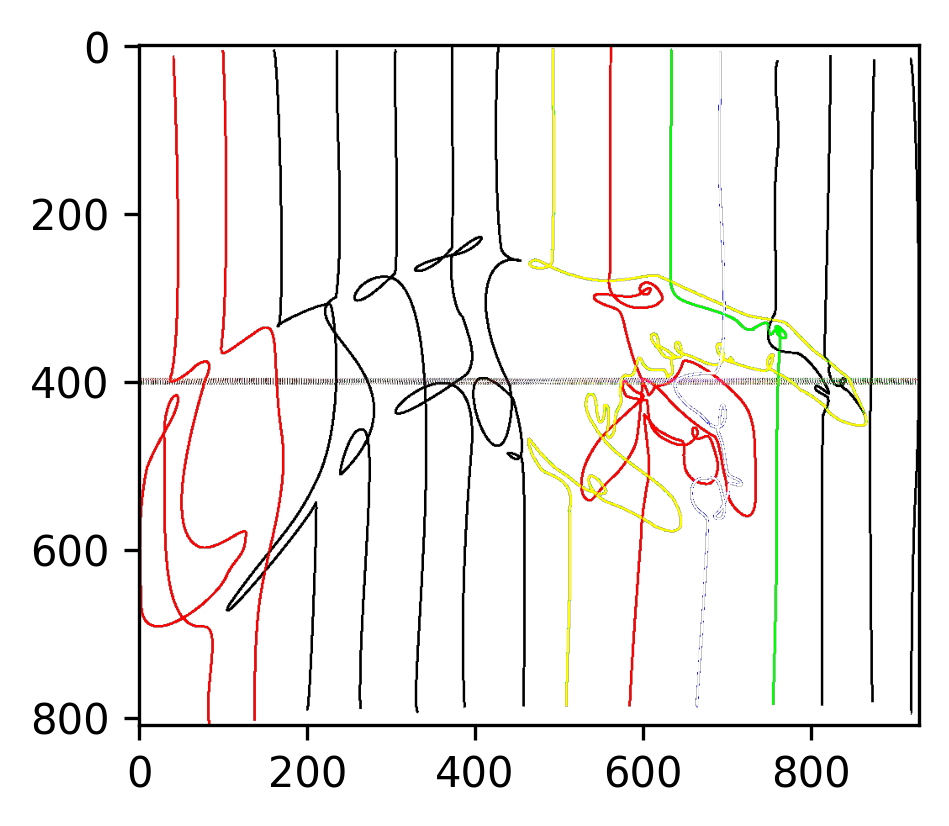

In [64]:

im_dft = fft2(image)
patch(im_dft, 600,400,s=250)

img = ifft2(im_dft).real
plt.imshow(img)